**1. Identifying highest temperature days for each year from year 2000-2022**

    Year                 Date  Temperature (°C)
0   2000  2000-09-01T00:00:00              33.9
1   2001  2001-07-22T00:00:00              35.0
2   2002  2002-07-21T00:00:00              35.6
3   2003  2003-08-21T00:00:00              35.0
4   2004  2004-06-08T00:00:00              32.8
5   2005  2005-07-24T00:00:00              38.9
6   2006  2006-07-31T00:00:00              37.2
7   2007  2007-07-08T00:00:00              34.4
8   2008  2008-09-02T00:00:00              34.4
9   2009  2009-06-23T00:00:00              34.4
10  2010  2010-07-23T00:00:00              34.4
11  2011  2011-07-20T00:00:00              37.2
12  2012  2012-07-05T00:00:00              39.4
13  2013  2013-07-19T00:00:00              35.6
14  2014  2014-06-17T00:00:00              32.8
15  2015  2015-06-10T00:00:00              33.3
16  2016  2016-06-20T00:00:00              33.9
17  2017  2017-06-12T00:00:00              35.0
18  2018  2018-05-27T00:00:00              36.1
19  2019  2019-07-20T00:00:00           

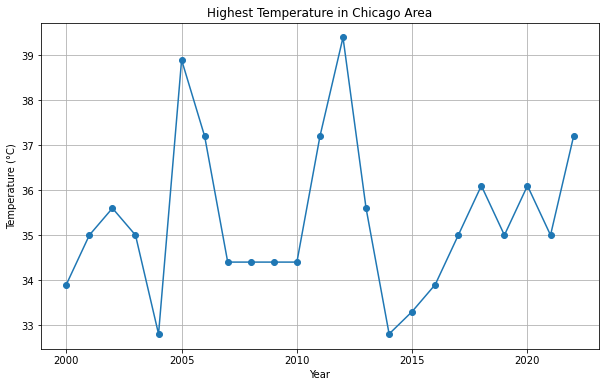

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# NOAA API base URL
base_url = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/data'

# Your NOAA API token
token = 'ObqSaNmDtjZSNXiwFXCVhVFOnGbBYepT'

# Parameters for API request
dataset_id = 'GHCND'  # Global Historical Climatology Network-Daily
station_id = 'GHCND:USW00094846'  # Chicago O'Hare International Airport station
start_year = 2000
end_year = 2022

# Initialize empty list to store highest temperature data
highest_temps = []

# Iterate over years
for year in range(start_year, end_year + 1):
    # Construct the API request URL for each year
    url = f"{base_url}?datasetid={dataset_id}&stationid={station_id}&datatypeid=TMAX&startdate={year}-01-01&enddate={year}-12-31&limit=365"

    # Send API request
    headers = {'token': token}
    response = requests.get(url, headers=headers)
    data = response.json()

    # Find the highest temperature and its corresponding date
    highest_temp = max(data['results'], key=lambda x: x['value'])
    highest_temps.append({'Year': year, 'Date': highest_temp['date'], 'Temperature (°C)': highest_temp['value'] / 10})

# Create a pandas DataFrame from the highest temperature data
df = pd.DataFrame(highest_temps)

# Save the data to an Excel file
df.to_excel('highest_temperatures.xlsx', index=False)

# Display the data frame
print(df)

# Plot a graph
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Temperature (°C)'], marker='o')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Highest Temperature in Chicago Area')
plt.grid(True)
plt.show()


          Year  Highest Temperature (°C)
0   2000-09-01                      33.9
1   2001-07-22                      35.0
2   2002-07-21                      35.6
3   2003-08-21                      35.0
4   2004-06-08                      32.8
5   2005-07-24                      38.9
6   2006-07-31                      37.2
7   2007-07-08                      34.4
8   2008-09-02                      34.4
9   2009-06-23                      34.4
10  2010-07-23                      34.4
11  2011-07-20                      37.2
12  2012-07-05                      39.4
13  2013-07-19                      35.6
14  2014-06-17                      32.8
15  2015-06-10                      33.3
16  2016-06-20                      33.9
17  2017-06-12                      35.0
18  2018-05-27                      36.1
19  2019-07-20                      35.0
20  2020-08-24                      36.1
21  2021-08-24                      35.0
22  2022-06-21                      37.2


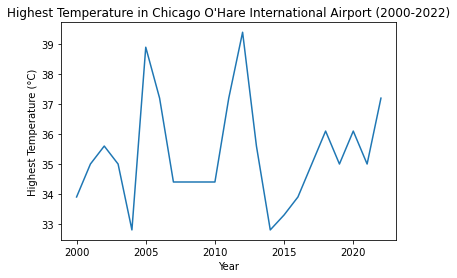

In [47]:
import requests
import matplotlib.pyplot as plt
import pandas as pd

# Function to fetch weather data for Chicago O'Hare International Airport
def fetch_weather_data(year):
    url = f"https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TMAX&stationid=GHCND:USW00094846&startdate={year}-01-01&enddate={year}-12-31&limit=365"
    headers = {"token": "ObqSaNmDtjZSNXiwFXCVhVFOnGbBYepT"}

    response = requests.get(url, headers=headers)
    data = response.json()

    return data

# Fetching highest temperature day for each year from 2000 to 2022
years = range(2000, 2023)
highest_temperature_days = []

for year in years:
    data = fetch_weather_data(year)
    temperatures = [(record['value'] / 10, record['date']) for record in data['results']]
    highest_temperature = max(temperatures, key=lambda x: x[0])
    highest_temperature_days.append((highest_temperature[0], highest_temperature[1]))

# Creating a table to display the highest temperature days
table_data = {'Year': [day[1][:10] for day in highest_temperature_days],
              'Highest Temperature (°C)': [day[0] for day in highest_temperature_days]}
df = pd.DataFrame(table_data)

# Displaying the table
print(df)

# Plotting the data in a line chart
plt.plot(years, [day[0] for day in highest_temperature_days])
plt.xlabel('Year')
plt.ylabel('Highest Temperature (°C)')
plt.title('Highest Temperature in Chicago O\'Hare International Airport (2000-2022)')
plt.show()


**2. Calculating five day moving average temperature for the study period**

          Year  Highest Temperature (°C)  Five-day Moving Average (°C)
0   2000-09-01                      33.9                     34.833333
1   2001-07-22                      35.0                     34.875000
2   2002-07-21                      35.6                     34.460000
3   2003-08-21                      35.0                     35.460000
4   2004-06-08                      32.8                     35.900000
5   2005-07-24                      38.9                     35.660000
6   2006-07-31                      37.2                     35.540000
7   2007-07-08                      34.4                     35.860000
8   2008-09-02                      34.4                     34.960000
9   2009-06-23                      34.4                     34.960000
10  2010-07-23                      34.4                     35.960000
11  2011-07-20                      37.2                     36.200000
12  2012-07-05                      39.4                     35.880000
13  20

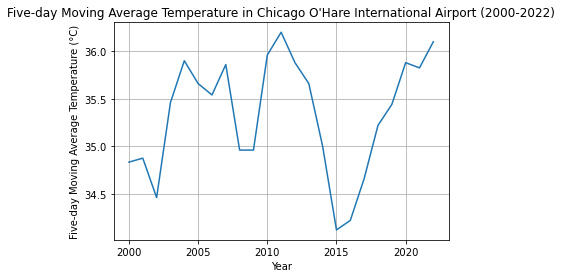

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Function to fetch weather data for Chicago O'Hare International Airport
def fetch_weather_data(year):
    url = f"https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TMAX&stationid=GHCND:USW00094846&startdate={year}-01-01&enddate={year}-12-31&limit=365"
    headers = {"token": "ObqSaNmDtjZSNXiwFXCVhVFOnGbBYepT"}

    response = requests.get(url, headers=headers)
    data = response.json()

    return data

# Fetching highest temperature day for each year from 2000 to 2022
years = range(2000, 2023)
highest_temperature_days = []

for year in years:
    data = fetch_weather_data(year)
    temperatures = [(record['value'] / 10, record['date']) for record in data['results']]
    highest_temperature = max(temperatures, key=lambda x: x[0])
    highest_temperature_days.append((highest_temperature[0], highest_temperature[1]))

# Calculate the five-day moving average temperature
moving_averages = pd.Series([day[0] for day in highest_temperature_days]).rolling(window=5, center=True, min_periods=1).mean()

# Creating a table to display the highest temperature and five-day moving average temperature
table_data = {'Year': [day[1][:10] for day in highest_temperature_days],
              'Highest Temperature (°C)': [day[0] for day in highest_temperature_days],
              'Five-day Moving Average (°C)': moving_averages}
df = pd.DataFrame(table_data)

# Displaying the table
print(df)

# Save the table to an Excel file
#df.to_excel('highest_temperatures.xlsx', index=False)

# Plotting the five-day moving average temperature
plt.plot(years, moving_averages)
plt.xlabel('Year')
plt.ylabel('Five-day Moving Average Temperature (°C)')
plt.title('Five-day Moving Average Temperature in Chicago O\'Hare International Airport (2000-2022)')

# Save the plotted graph as a PNG image
#plt.savefig('moving_average_graph.png')

# Display the plot
plt.grid(True)
plt.show()


          Year  Station 1 Highest Temperature (°C)  \
0   2000-09-01                                33.9   
1   2001-07-22                                35.0   
2   2002-07-21                                35.6   
3   2003-08-21                                35.0   
4   2004-06-08                                32.8   
5   2005-07-24                                38.9   
6   2006-07-31                                37.2   
7   2007-07-08                                34.4   
8   2008-09-02                                34.4   
9   2009-06-23                                34.4   
10  2010-07-23                                34.4   
11  2011-07-20                                37.2   
12  2012-07-05                                39.4   
13  2013-07-19                                35.6   
14  2014-06-17                                32.8   
15  2015-06-10                                33.3   
16  2016-06-20                                33.9   
17  2017-06-12              

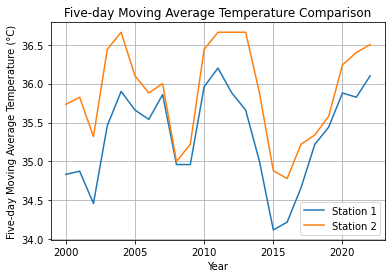

In [82]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Function to fetch weather data for a given station and year
def fetch_weather_data(station_id, year):
    url = f"https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TMAX&stationid={station_id}&startdate={year}-01-01&enddate={year}-12-31&limit=365"
    headers = {"token": "ObqSaNmDtjZSNXiwFXCVhVFOnGbBYepT"}

    response = requests.get(url, headers=headers)
    data = response.json()

    return data

# Fetching highest temperature day for each year from 2000 to 2022 for Chicago O'Hare International Airport
station1_id = 'GHCND:USW00094846'
station1_highest_temperature_days = []

for year in years:
    data = fetch_weather_data(station1_id, year)
    temperatures = [(record['value'] / 10, record['date']) for record in data['results']]
    highest_temperature = max(temperatures, key=lambda x: x[0])
    station1_highest_temperature_days.append((highest_temperature[0], highest_temperature[1]))

# Fetching highest temperature day for each year from 2000 to 2022 for Chicago Midway International Airport
station2_id = 'GHCND:USW00014819'
station2_highest_temperature_days = []

for year in years:
    data = fetch_weather_data(station2_id, year)
    temperatures = [(record['value'] / 10, record['date']) for record in data['results']]
    highest_temperature = max(temperatures, key=lambda x: x[0])
    station2_highest_temperature_days.append((highest_temperature[0], highest_temperature[1]))

# Calculate the five-day moving average temperature for each station
station1_moving_averages = pd.Series([day[0] for day in station1_highest_temperature_days]).rolling(window=5, center=True, min_periods=1).mean()
station2_moving_averages = pd.Series([day[0] for day in station2_highest_temperature_days]).rolling(window=5, center=True, min_periods=1).mean()

# Creating a table to display the highest temperature and five-day moving average temperature for each station
table_data = {'Year': [day[1][:10] for day in station1_highest_temperature_days],
              'Station 1 Highest Temperature (°C)': [day[0] for day in station1_highest_temperature_days],
              'Station 2 Highest Temperature (°C)': [day[0] for day in station2_highest_temperature_days],
              'Station 1 Five-day Moving Average (°C)': station1_moving_averages,
              'Station 2 Five-day Moving Average (°C)': station2_moving_averages}
df = pd.DataFrame(table_data)

# Displaying the table
print(df)

# Save the table to an Excel file
df.to_excel('highest_temperatures_comparison.xlsx', index=False)

# Plotting the five-day moving average temperature for each station
plt.plot(years, station1_moving_averages, label='Station 1')
plt.plot(years, station2_moving_averages, label='Station 2')
plt.xlabel('Year')
plt.grid(True)
plt.ylabel('Five-day Moving Average Temperature (°C)')
plt.title('Five-day Moving Average Temperature Comparison')
plt.legend()


# Display the plot
plt.show()



          Year  Chicago O'Hare International Airport Highest Temperature (°C)  \
0   2000-09-01                                               33.9               
1   2001-07-22                                               35.0               
2   2002-07-21                                               35.6               
3   2003-08-21                                               35.0               
4   2004-06-08                                               32.8               
5   2005-07-24                                               38.9               
6   2006-07-31                                               37.2               
7   2007-07-08                                               34.4               
8   2008-09-02                                               34.4               
9   2009-06-23                                               34.4               
10  2010-07-23                                               34.4               
11  2011-07-20              

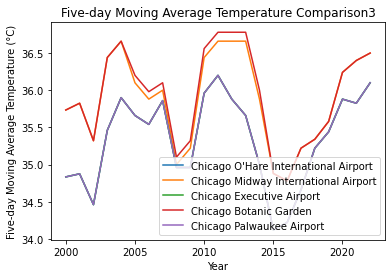

In [84]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Function to fetch weather data for a given station and year
def fetch_weather_data(station_id, year):
    url = f"https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TMAX&stationid={station_id}&startdate={year}-01-01&enddate={year}-12-31&limit=365"
    headers = {"token": "ObqSaNmDtjZSNXiwFXCVhVFOnGbBYepT"}

    response = requests.get(url, headers=headers)
    data = response.json()

    return data

# Fetching highest temperature day for each year from 2000 to 2022 for each weather station
stations = [
    {'name': 'Chicago O\'Hare International Airport', 'id': 'GHCND:USW00094846'},
    {'name': 'Chicago Midway International Airport', 'id': 'GHCND:USW00014819'},
    {'name': 'Chicago Executive Airport', 'id': 'GHCND:USW00094846'},
    {'name': 'Chicago Botanic Garden', 'id': 'GHCND:USC00111577'},
    {'name': 'Chicago Palwaukee Airport', 'id': 'GHCND:USW00094846'}
]

highest_temperature_days = {station['name']: [] for station in stations}

for year in years:
    for station in stations:
        try:
            data = fetch_weather_data(station['id'], year)
            temperatures = [(record['value'] / 10, record['date']) for record in data['results']]
            highest_temperature = max(temperatures, key=lambda x: x[0])
            highest_temperature_days[station['name']].append((highest_temperature[0], highest_temperature[1]))
        except KeyError:
            print(f"No data available for {station['name']} in {year}. Skipping...")

# Calculate the five-day moving average temperature for each station
moving_averages = {station['name']: pd.Series([day[0] for day in highest_temperature_days[station['name']]]).rolling(window=5, center=True, min_periods=1).mean() for station in stations}

# Creating a table to display the highest temperature and five-day moving average temperature for each station
table_data = {'Year': [day[1][:10] for day in highest_temperature_days[stations[0]['name']]],
              **{station['name'] + ' Highest Temperature (°C)': [day[0] for day in highest_temperature_days[station['name']]] for station in stations},
              **{station['name'] + ' Five-day Moving Average (°C)': moving_averages[station['name']] for station in stations}}
df = pd.DataFrame(table_data)

# Displaying the table
print(df)

# Save the table to an Excel file
df.to_excel('highest_temperatures_comparison3.xlsx', index=False)

# Plotting the five-day moving average temperature for each station
for station in stations:
    plt.plot(years, moving_averages[station['name']], label=station['name'])

plt.xlabel('Year')
plt.ylabel('Five-day Moving Average Temperature (°C)')
plt.title('Five-day Moving Average Temperature Comparison3')
plt.legend()


# Display the plot
plt.show()


# 2. Showing Highest Temperature Day along with 5 day moving average 

In [34]:
def get_highest_temperatures(year, token):
    base_url = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/data'
    headers = {'token': token}
    params = {
        'stationid': 'GHCND:USW00094846',
        'datasetid': 'GHCND',
        'datatypeid': 'TMAX',
        'startdate': f'{year}-01-01',
        'enddate': f'{year}-12-31',
        'limit': 1000,
        'units': 'metric'
    }
    response = requests.get(base_url, headers=headers, params=params)
    data = response.json()
    df = pd.DataFrame(data['results'])
    df['date'] = pd.to_datetime(df['date'])
    df['value'] = df['value'].astype(float)
    df = df.set_index('date')
    highest_temperatures = df.groupby(pd.Grouper(freq='Y'))['value'].idxmax()
    return highest_temperatures


In [35]:
def calculate_moving_average(year, highest_temperatures):
    df = pd.DataFrame()
    for date in highest_temperatures:
        start_date = date - pd.DateOffset(days=2)
        end_date = date + pd.DateOffset(days=2)
        base_url = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/data'
        headers = {'token': token}
        params = {
            'stationid': 'GHCND:USW00094846',
            'datasetid': 'GHCND',
            'datatypeid': 'TMAX',
            'startdate': start_date.strftime('%Y-%m-%d'),
            'enddate': end_date.strftime('%Y-%m-%d'),
            'limit': 1000,
            'units': 'metric'
        }
        response = requests.get(base_url, headers=headers, params=params)
        data = response.json()
        df_temp = pd.DataFrame(data['results'])
        df_temp['date'] = pd.to_datetime(df_temp['date'])
        df_temp['value'] = df_temp['value'].astype(float)
        df_temp = df_temp.set_index('date')
        df_temp = df_temp.resample('D').mean()
        df_temp['year'] = year
        df = pd.concat([df, df_temp])
    df = df.groupby('year')['value'].rolling(window=5, min_periods=1).mean().reset_index()
    return df


In [38]:
token = 'ObqSaNmDtjZSNXiwFXCVhVFOnGbBYepT'
years = range(2000, 2023)

highest_temperatures_table = pd.DataFrame(columns=['Year', 'Highest Temperature Date'])
moving_average_table = pd.DataFrame()

for year in years:
    highest_temperatures = get_highest_temperatures(year, token)
    highest_temperature_date = highest_temperatures.dt.date.iloc[0]
    highest_temperatures_table = highest_temperatures_table.append({
        'Year': year,
        'Highest Temperature Date': highest_temperature_date
    }, ignore_index=True)
    moving_average = calculate_moving_average(year, highest_temperatures)
    moving_average_table = pd.concat([moving_average_table, moving_average], ignore_index=True)

highest_temperatures_table.to_excel('highest_temperatures.xlsx', index=False)
moving_average_table.to_excel('moving_average_temperatures.xlsx', index=False)


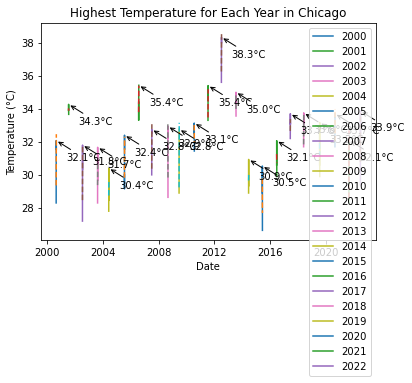

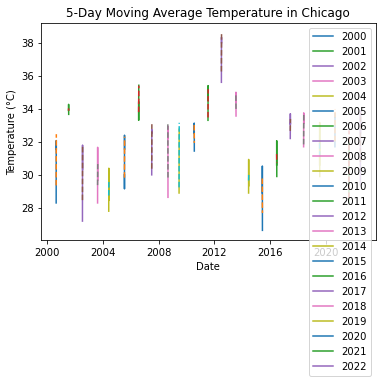

In [43]:
import numpy as np

# Plotting highest temperature values with trend line and values
for year in years:
    subset = moving_average_table[moving_average_table['year'] == year]
    plt.plot(subset['date'], subset['value'], label=str(year))

    # Calculate and plot the trend line
    z = np.polyfit(range(len(subset)), subset['value'], 1)
    p = np.poly1d(z)
    plt.plot(subset['date'], p(range(len(subset))), '--')

    # Annotate the highest temperature value for each year
    max_temp = subset['value'].max()
    max_temp_date = subset.loc[subset['value'].idxmax(), 'date']
    plt.annotate(f'{max_temp:.1f}°C', xy=(max_temp_date, max_temp), xytext=(10, -20),
                 textcoords='offset points', arrowprops=dict(arrowstyle='->', color='black'))

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Highest Temperature for Each Year in Chicago')
plt.legend()
plt.show()

# Plotting 5-day moving average temperature values with trend line
for year in years:
    subset = moving_average_table[moving_average_table['year'] == year]
    plt.plot(subset['date'], subset['value'], label=str(year))

    # Calculate and plot the trend line
    z = np.polyfit(range(len(subset)), subset['value'], 1)
    p = np.poly1d(z)
    plt.plot(subset['date'], p(range(len(subset))), '--')

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('5-Day Moving Average Temperature in Chicago')
plt.legend()
plt.show()
